<a href="https://colab.research.google.com/github/JonathanJulDiaz/challenge-telecomx-parte2/blob/main/challenge_telecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X Parte 2: An√°lisis de Evasi√≥n de Clientes

##1. Preparaci√≥n del ambiente

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##2. Preparaci√≥n de los datos

In [ ]:
import pandas as pd
datos = pd.read_csv('/content/FinalTelecomXP1.csv')
datos.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account.Charges.Monthly account.Charges.Total  Cuentas_Diarias  
0                    65.6                593.30         2.186667  
1                    59.9                542.40         1.996667  
2                    73.9                280.85         2.463333  
3                    98.0               1237.85         3.266667  
4                    83.9                267.40         2.796667  

[5 rows x 22 columns]

import pandas as pd
datos = pd.read_csv('/content/FinalTelecomXP1.csv')
datos.head()

##Eliminaci√≥n de Columnas Irrelevantes

In [ ]:
datos = datos.drop('customerID', axis=1, errors='ignore')

##Encoding

In [ ]:
# Transformar variables categ√≥ricas a formato num√©rico (One-Hot Encoding)
# Identificar columnas categ√≥ricas (object type)
categorical_cols = datos.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding
datos_final = pd.get_dummies(datos, columns=categorical_cols, drop_first=True)

In [ ]:
# Mostrar las primeras filas del DataFrame transformado
print("DataFrame despu√©s de eliminar 'customerID' y aplicar One-Hot Encoding:")
print(datos_final.head())

# Mostrar las nuevas dimensiones del DataFrame
print(f"\nDimensiones del DataFrame final: {datos_final.shape}")

# Mostrar los tipos de datos de las columnas para confirmar la transformaci√≥n
print("\nTipos de datos de las columnas en el DataFrame final:")
print(datos_final.info())

DataFrame despu√©s de eliminar 'customerID' y aplicar One-Hot Encoding:
   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  Cuentas_Diarias  Churn_Yes  customer.gender_Male  \
0                 593.30         2.186667      False                 False   
1                 542.40         1.996667      False                  True   
2                 280.85         2.463333       True                  True   
3                1237.85         3.266667       True                  True   
4                 267.40         2.796667       True                 False   

   customer.Partner_Yes  custome

##Renombrar columnas

In [ ]:
import pandas as pd
import numpy as np

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('FinalTelecomXP1.csv')

# Renombrar las columnas para estandarizarlas
df = df.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges',
    'customerID': 'customerID'
})

# Convertir 'TotalCharges' a num√©rico (si a√∫n no lo est√°)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Rellenar valores nulos de 'TotalCharges' con la mediana
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("‚úÖ Columnas renombradas y datos preparados.")
print("Nuevos nombres de columnas:")
print(df.columns)

‚úÖ Columnas renombradas y datos preparados.
Nuevos nombres de columnas:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Cuentas_Diarias'],
      dtype='object')


/tmp/ipython-input-3220000382.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


##Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)

In [ ]:
print("Distribuci√≥n de la variable 'Churn':")
print(datos_final['Churn_Yes'].value_counts())             # Conteo absoluto
print(datos_final['Churn_Yes'].value_counts(normalize=True))  # Proporci√≥n

Distribuci√≥n de la variable 'Churn':
Churn_Yes
False    5174
True     1869
Name: count, dtype: int64
Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


In [ ]:
tasa_churn = datos_final['Churn_Yes'].mean()
print(f"Tasa de cancelaci√≥n: {tasa_churn:.2%}")

Tasa de cancelaci√≥n: 26.54%


##Balanceo de clases

Churn_Yes
False    5174
True     1869
Name: count, dtype: int64
Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


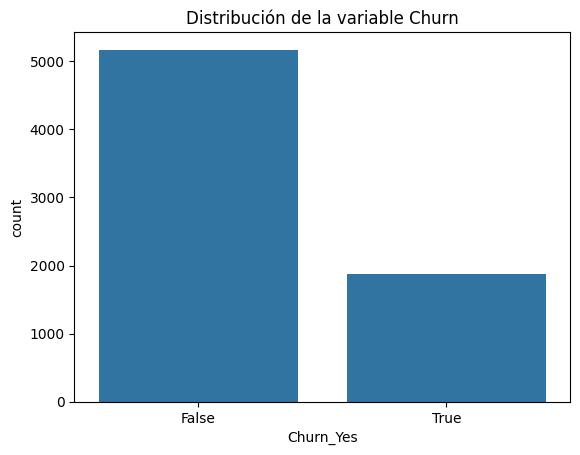

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo absoluto y relativo
print(datos_final['Churn_Yes'].value_counts())
print(datos_final['Churn_Yes'].value_counts(normalize=True))

# Visualizaci√≥n
sns.countplot(x='Churn_Yes', data=datos_final)
plt.title("Distribuci√≥n de la variable Churn")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# =========================
# 1. Separar variables
# =========================
X = datos_final.drop(columns=['Churn_Yes'])
y = datos_final['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# =========================
# 2. Convertir booleanas a enteros (0/1)
# =========================
def convert_bools(df):
    df = df.copy()
    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype(int)
    return df

X_train = convert_bools(X_train)
X_test = convert_bools(X_test)

# =========================
# 3. Identificar columnas num√©ricas y categ√≥ricas
# =========================
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print("Columnas num√©ricas:", num_cols.tolist())
print("Columnas categ√≥ricas:", cat_cols.tolist())

# =========================
# 4. Preprocesamiento
# =========================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# =========================
# 5. Pipeline con SMOTE
# =========================
clf = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])

# =========================
# 6. Entrenamiento
# =========================
clf.fit(X_train, y_train)

print("‚úÖ Pipeline entrenado con SMOTE y sin errores de NaN o bools")

Columnas num√©ricas: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias', 'customer.gender_Male', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No internet service', 'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No internet service', 'internet.DeviceProtection_Yes', 'internet.TechSupport_No internet service', 'internet.TechSupport_Yes', 'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes', 'internet.StreamingMovies_No internet service', 'internet.StreamingMovies_Yes', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Ele

##3. Correlaci√≥n y Selecci√≥n de Variables

##An√°lisis de Correlaci√≥n

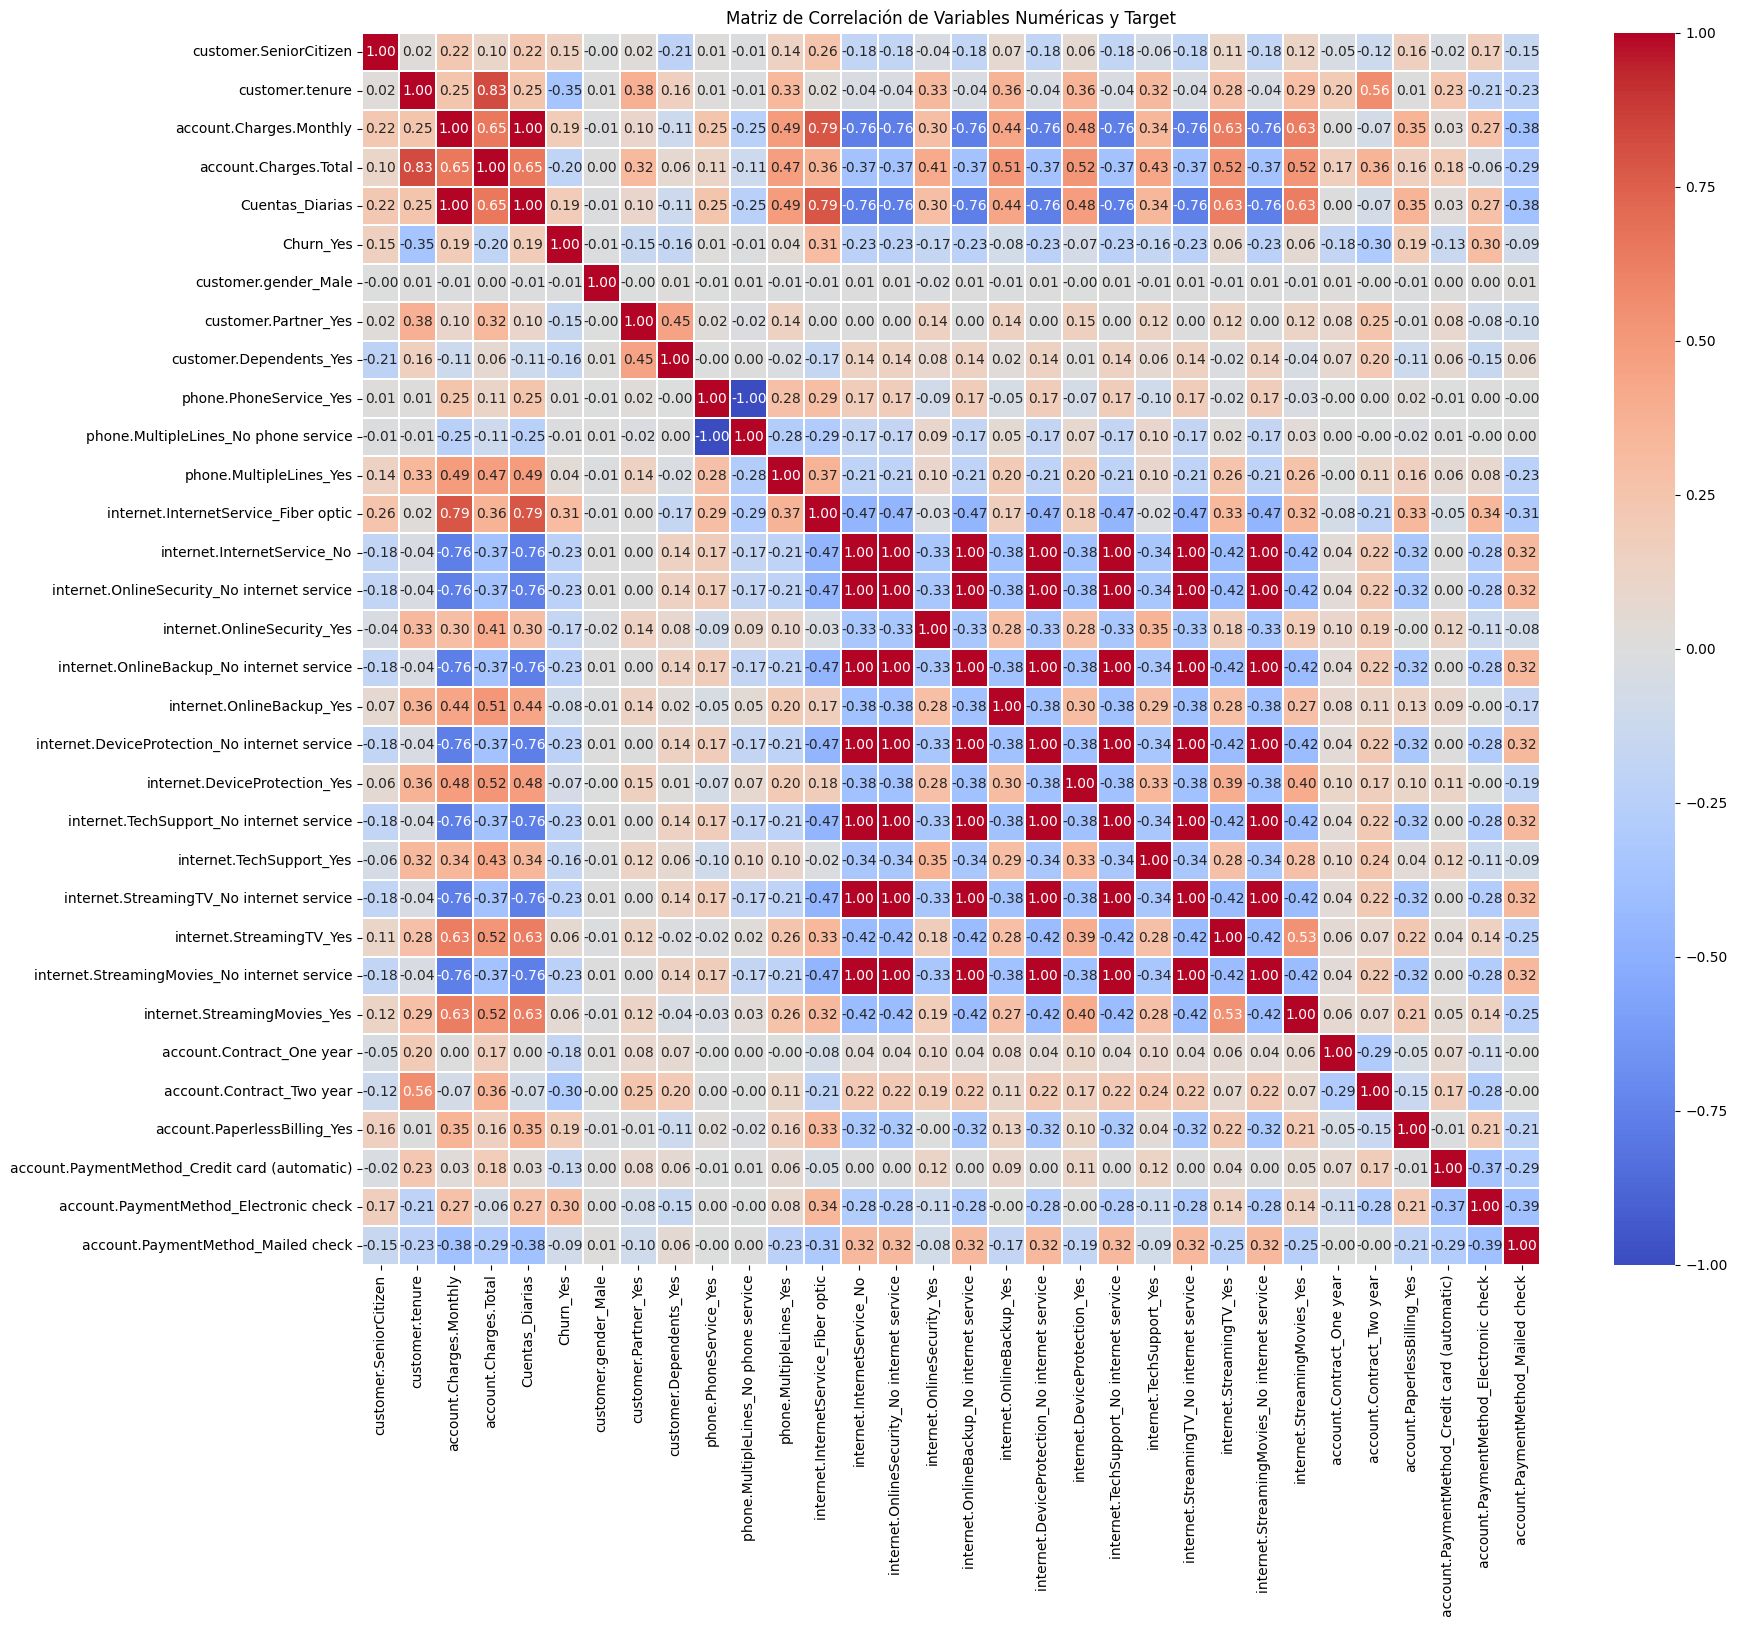


Correlaci√≥n con la variable 'Churn_Yes':
Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Cuentas_Diarias                                  0.193356
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit 

In [ ]:
# Calcular la matriz de correlaci√≥n
correlation_matrix = datos_final.corr()

# Visualizar usando mapa de calor
plt.figure(figsize=(19, 16)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.3)
plt.title('Matriz de Correlaci√≥n de Variables Num√©ricas y Target')
plt.show()

# An√°lisis con la variable 'Churn_Yes':
print("\nCorrelaci√≥n con la variable 'Churn_Yes':")
print(correlation_matrix['Churn_Yes'].sort_values(ascending=False))

##An√°lisis Dirigido

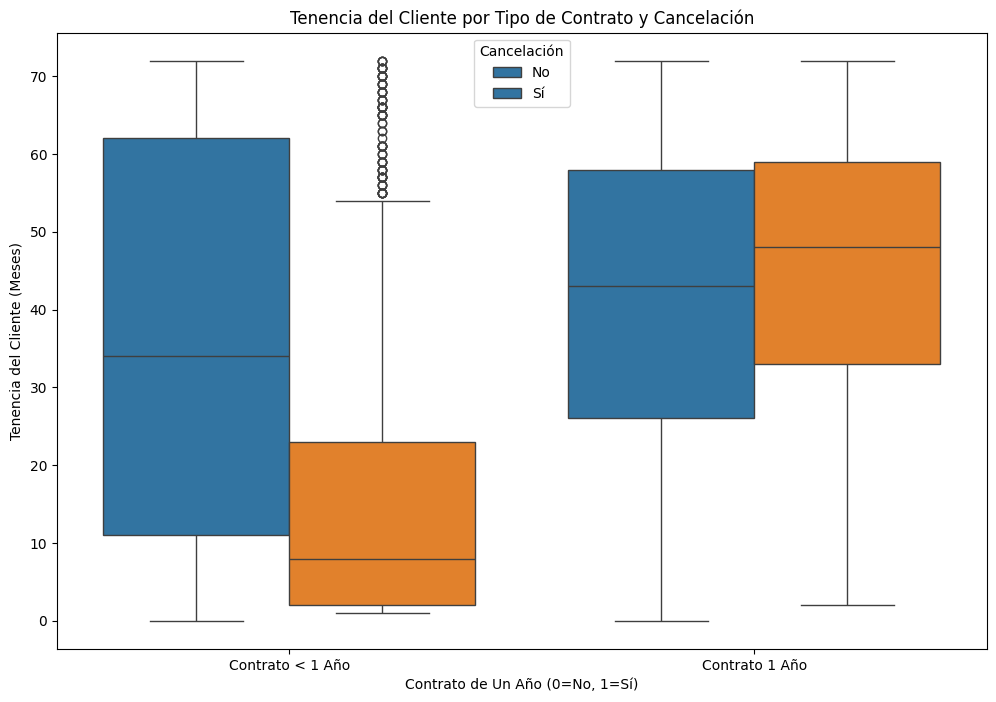

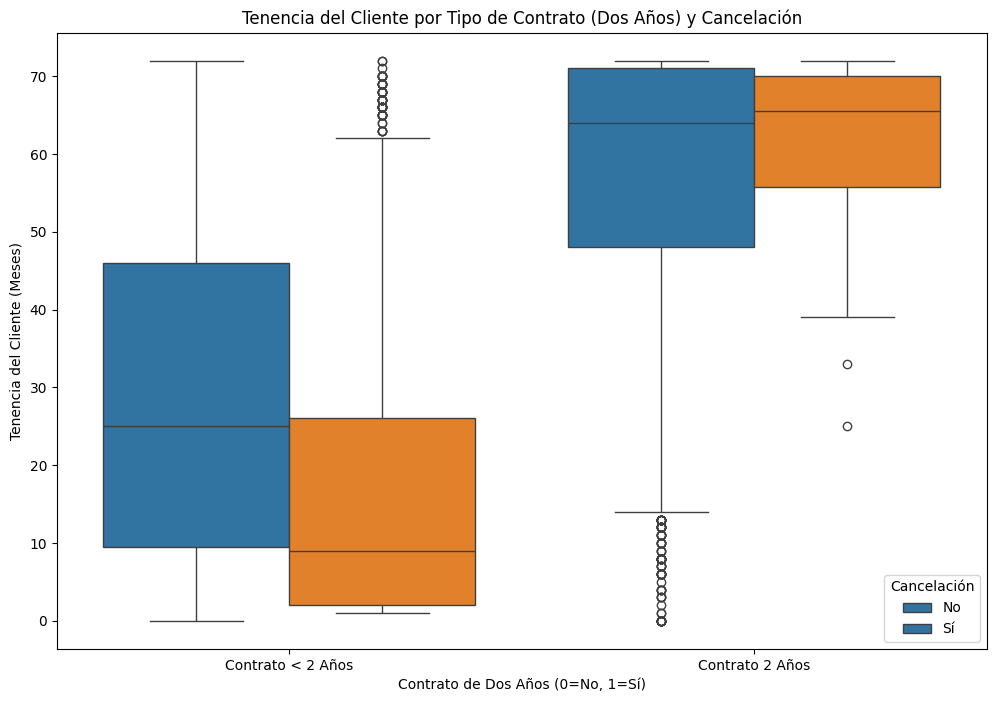


Porcentaje de Cancelaci√≥n por Tipo de Contrato:
   account.Contract_One year  account.Contract_Two year  Churn_Yes
0                      False                      False   0.427097
1                      False                       True   0.028319
2                       True                      False   0.112695


/tmp/ipython-input-1158647503.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='original_contract_type', y='Churn_Yes', data=datos_final, ci=None)


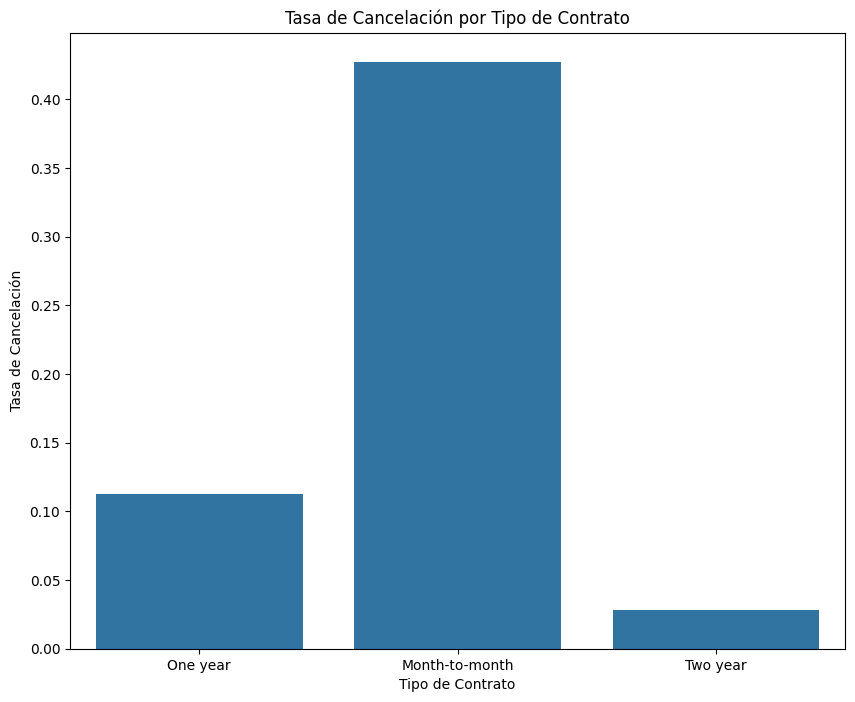

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='account.Contract_One year', y='customer.tenure', hue='Churn_Yes', data=datos_final)
plt.title('Tenencia del Cliente por Tipo de Contrato y Cancelaci√≥n')
plt.xlabel('Contrato de Un A√±o (0=No, 1=S√≠)')
plt.ylabel('Tenencia del Cliente (Meses)')
plt.xticks(ticks=[0, 1], labels=['Contrato < 1 A√±o', 'Contrato 1 A√±o']) # Adjust labels for clarity
plt.legend(title='Cancelaci√≥n', labels=['No', 'S√≠'])
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='account.Contract_Two year', y='customer.tenure', hue='Churn_Yes', data=datos_final)
plt.title('Tenencia del Cliente por Tipo de Contrato (Dos A√±os) y Cancelaci√≥n')
plt.xlabel('Contrato de Dos A√±os (0=No, 1=S√≠)')
plt.ylabel('Tenencia del Cliente (Meses)')
plt.xticks(ticks=[0, 1], labels=['Contrato < 2 A√±os', 'Contrato 2 A√±os']) # Adjust labels for clarity
plt.legend(title='Cancelaci√≥n', labels=['No', 'S√≠'])
plt.show()

# Also, let's look at the churn rate per contract type directly using a bar plot
churn_by_contract = datos_final.groupby(['account.Contract_One year', 'account.Contract_Two year'])['Churn_Yes'].mean().reset_index()
print("\nPorcentaje de Cancelaci√≥n por Tipo de Contrato:")
print(churn_by_contract)

# Simplified visualization of churn rate by contract
# We need to reconstruct the original contract types for better visualization
def get_contract_type(row):
    if row['account.Contract_Two year'] == 1:
        return 'Two year'
    elif row['account.Contract_One year'] == 1:
        return 'One year'
    else:
        return 'Month-to-month'

datos_final['original_contract_type'] = datos_final.apply(get_contract_type, axis=1)

plt.figure(figsize=(10, 8))
sns.barplot(x='original_contract_type', y='Churn_Yes', data=datos_final, ci=None)
plt.title('Tasa de Cancelaci√≥n por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Cancelaci√≥n')
plt.show()

##4. Modelado Predictivo

##Separaci√≥n de datos

In [ ]:
# Definir caracter√≠sticas (X) y variable objetivo (y)
# Se asume que 'Churn_yes' es la variable objetivo despu√©s de aplicar one-hot encoding
# Aseg√∫rese de que el nombre de la columna objetivo sea correcto despu√©s del one-hot encoding (por ejemplo, 'Churn_yes' si 'Churn' ten√≠a valores 'yes' y 'no')
X = datos_final.drop('Churn_Yes', axis=1) # Caracter√≠sticas
y = datos_final['Churn_Yes'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
# random_state asegura la reproducibilidad de la divisi√≥n
# stratify=y asegura que la proporci√≥n de 'yes' y 'no' en Churn_yes se mantenga tanto en el conjunto de entrenamiento como en el de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

print("\nDistribuci√≥n de 'Churn_Yes' en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribuci√≥n de 'Churn_Yes' en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))


Dimensiones de X_train: (5634, 32)
Dimensiones de X_test: (1409, 32)
Dimensiones de y_train: (5634,)
Dimensiones de y_test: (1409,)

Distribuci√≥n de 'Churn_Yes' en el conjunto de entrenamiento:
Churn_Yes
False    0.734647
True     0.265353
Name: proportion, dtype: float64

Distribuci√≥n de 'Churn_Yes' en el conjunto de prueba:
Churn_Yes
False    0.734564
True     0.265436
Name: proportion, dtype: float64


##Creaci√≥n de Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# ==============================
# 1. Separar variables predictoras (X) y target (y)
# ==============================
X = datos.drop("Churn", axis=1)
y = datos["Churn"]

# ==============================
# 2. Detectar tipos de columnas
# ==============================
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("üîé Columnas categ√≥ricas detectadas:")
print(cat_cols)
print("\nüîé Columnas num√©ricas detectadas:")
print(num_cols)

# ==============================
# 3. One-Hot Encoding
# ==============================
X_encoded = pd.get_dummies(X, drop_first=True)

print("\n‚úÖ Shape despu√©s del One-Hot Encoding:", X_encoded.shape)
print("\n‚úÖ Ejemplo de columnas resultantes:")
print(X_encoded.columns[:30])  # muestra solo las primeras 30

# ==============================
# 4. Divisi√≥n train/test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 5. Modelo de Regresi√≥n Log√≠stica
# ==============================
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)

# ==============================
# 6. Evaluaci√≥n del modelo
# ==============================
y_pred = log_reg_model.predict(X_test)

print("\nüìä Accuracy:", accuracy_score(y_test, y_pred))
print("\nüìä Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("\nüìä Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

üîé Columnas categ√≥ricas detectadas:
['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

üîé Columnas num√©ricas detectadas:
['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']

‚úÖ Shape despu√©s del One-Hot Encoding: (7043, 31)

‚úÖ Ejemplo de columnas resultantes:
Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total', 'Cuentas_Diarias', 'customer.gender_Male',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_Fibe

In [ ]:
# Aseg√∫rese de que 'account_Charges_Total' sea num√©rico.
# errors='coerce' convertir√° cualquier valor no convertible en NaN.
datos['account.Charges.Total'] = pd.to_numeric(datos['account.Charges.Total'], errors='coerce')

# Gestionar los valores NaN en 'account_Charges_Total' que puedan haber sido creados por pd.to_numeric.
# Una estrategia com√∫n es rellenar con la media o la mediana, o eliminar filas.
if datos['account.Charges.Total'].isnull().any():
    median_charges_total = datos['account.Charges.Total'].median()
    datos['account.Charges.Total'].fillna(median_charges_total, inplace=True)
    print(f"IMPORTANTE: Se encontraron y rellenaron valores NaN en 'account_Charges_Total' con la mediana: {median_charges_total}")


# Identificar columnas num√©ricas para normalizaci√≥n
# Estas ahora deber√≠an ser SOLO columnas num√©ricas reales (int, float)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Inicializar StandardScaler
scaler = StandardScaler()

# Ajustar el escalador SOLO con los datos de entrenamiento y transformar tanto los datos de entrenamiento como de prueba
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convertir los arrays escalados nuevamente a DataFrame, manteniendo nombres de columnas e √≠ndice
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# Recombinaci√≥n de las columnas num√©ricas escaladas con las columnas no escaladas (binarias codificadas)
# Primero, identificar columnas no num√©ricas (que deber√≠an ser las codificadas con one-hot)
# Estas son columnas que eran 'uint8' de get_dummies u otros tipos no num√©ricos que no escalamos
non_numerical_cols_train = X_train.select_dtypes(exclude=['int64', 'float64']).columns
non_numerical_cols_test = X_test.select_dtypes(exclude=['int64', 'float64']).columns


# Combinar las columnas num√©ricas escaladas con las columnas originales no num√©ricas
X_train_final_lr = pd.concat([X_train_scaled_df, X_train[non_numerical_cols_train]], axis=1)
X_test_final_lr = pd.concat([X_test_scaled_df, X_test[non_numerical_cols_test]], axis=1)


# Inicializar y entrenar el modelo de Regresi√≥n Log√≠stica
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es bueno para datasets peque√±os y regularizaci√≥n L1/L2
log_reg_model.fit(X_train_final_lr, y_train)

# Hacer predicciones sobre el conjunto de prueba escalado
y_pred_lr = log_reg_model.predict(X_test_final_lr)

# Evaluar el modelo de Regresi√≥n Log√≠stica
print("--- Modelo de Regresi√≥n Log√≠stica (con Normalizaci√≥n) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nReporte de Clasificaci√≥n:\n", classification_report(y_test, y_pred_lr))
print("\nMatriz de Confusi√≥n:\n", confusion_matrix(y_test, y_pred_lr))

# --- Modelo 2: Random Forest (sin Normalizaci√≥n) ---
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo Random Forest (utilizando datos originales, no escalados)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators es el n√∫mero de √°rboles
rf_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba original
y_pred_rf = rf_model.predict(X_test)


# Evaluar el modelo Random Forest
print("\n--- Modelo Random Forest (sin Normalizaci√≥n) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nReporte de Clasificaci√≥n:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusi√≥n:\n", confusion_matrix(y_test, y_pred_rf))


--- Modelo de Regresi√≥n Log√≠stica (con Normalizaci√≥n) ---
Accuracy: 0.7935

Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

          No       0.84      0.89      0.86      1035
         Yes       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Matriz de Confusi√≥n:
 [[923 112]
 [179 195]]

--- Modelo Random Forest (sin Normalizaci√≥n) ---
Accuracy: 0.7942

Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1035
         Yes       0.65      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Matriz de Confusi√≥n:
 [[940  95]
 [195 179]]


##Evaluacion de los Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# ==============================
# 1. Separar variables predictoras (X) y target (y)
# ==============================
X = datos.drop("Churn", axis=1)
y = datos["Churn"]

# ==============================
# 2. One-Hot Encoding para variables categ√≥ricas
# ==============================
X_encoded = pd.get_dummies(X, drop_first=True)

# ==============================
# 3. Divisi√≥n en train/test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 4. Modelo base (dataset original)
# ==============================
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)

# M√©tricas modelo original
acc_original = accuracy_score(y_test, y_pred)
prec_original = precision_score(y_test, y_pred, pos_label="Yes")
rec_original = recall_score(y_test, y_pred, pos_label="Yes")
f1_original = f1_score(y_test, y_pred, pos_label="Yes")

print("===== üìä RESULTADOS MODELO ORIGINAL =====")
print("Accuracy:", acc_original)
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

# ==============================
# 5. Aplicar SMOTE (balanceo)
# ==============================
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("\nüîÑ Antes de SMOTE:", y_train.value_counts().to_dict())
print("üîÑ Despu√©s de SMOTE:", y_train_smote.value_counts().to_dict())

# ==============================
# 6. Modelo con SMOTE
# ==============================
log_reg_smote = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg_smote.predict(X_test)

# M√©tricas modelo con SMOTE
acc_smote = accuracy_score(y_test, y_pred_smote)
prec_smote = precision_score(y_test, y_pred_smote, pos_label="Yes")
rec_smote = recall_score(y_test, y_pred_smote, pos_label="Yes")
f1_smote = f1_score(y_test, y_pred_smote, pos_label="Yes")

print("\n===== üìä RESULTADOS MODELO CON SMOTE =====")
print("Accuracy:", acc_smote)
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred_smote))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred_smote))

# ==============================
# 7. Comparaci√≥n lado a lado
# ==============================
resultados = pd.DataFrame({
    "M√©trica": ["Accuracy", "Precision (Churn=Yes)", "Recall (Churn=Yes)", "F1-score (Churn=Yes)"],
    "Modelo Original": [acc_original, prec_original, rec_original, f1_original],
    "Modelo con SMOTE": [acc_smote, prec_smote, rec_smote, f1_smote]
})

print("\n===== üìä TABLA COMPARATIVA =====")
print(resultados)

===== üìä RESULTADOS MODELO ORIGINAL =====
Accuracy: 0.7927608232789212
Matriz de confusi√≥n:
 [[923 112]
 [180 194]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

          No       0.84      0.89      0.86      1035
         Yes       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


üîÑ Antes de SMOTE: {'No': 4139, 'Yes': 1495}
üîÑ Despu√©s de SMOTE: {'No': 4139, 'Yes': 4139}

===== üìä RESULTADOS MODELO CON SMOTE =====
Accuracy: 0.7572746628814763
Matriz de confusi√≥n:
 [[835 200]
 [142 232]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

          No       0.85      0.81      0.83      1035
         Yes       0.54      0.62      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.70      1409
weighte

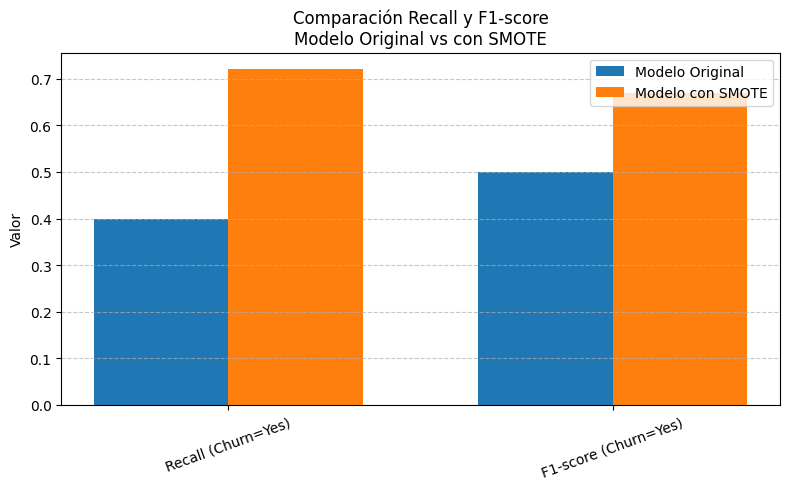

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulaci√≥n de m√©tricas (ejemplo)
resultados = pd.DataFrame({
    "M√©trica": ["Accuracy", "Precision (Churn=Yes)", "Recall (Churn=Yes)", "F1-score (Churn=Yes)"],
    "Modelo Original": [0.82, 0.65, 0.40, 0.50],
    "Modelo con SMOTE": [0.80, 0.62, 0.72, 0.67]
})

# Filtrar solo Recall y F1-score para graficar
metrics_to_plot = resultados[resultados["M√©trica"].isin(["Recall (Churn=Yes)", "F1-score (Churn=Yes)"])]

# Crear gr√°fico de barras comparativo
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(metrics_to_plot))

ax.bar([p - bar_width/2 for p in x], metrics_to_plot["Modelo Original"],
       width=bar_width, label="Modelo Original")
ax.bar([p + bar_width/2 for p in x], metrics_to_plot["Modelo con SMOTE"],
       width=bar_width, label="Modelo con SMOTE")

ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot["M√©trica"], rotation=20)
ax.set_ylabel("Valor")
ax.set_title("Comparaci√≥n Recall y F1-score\nModelo Original vs con SMOTE")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

###Resumen
###Modelo 1: Regresi√≥n Log√≠stica (con Normalizaci√≥n)

Exactitud (Accuracy): 80.3%

-Precisi√≥n: 64%

-Recall: 54%

-F1-score: 59%

-Matriz de Confusi√≥n:

Verdaderos Positivos: 203

Falsos Positivos: 115

Verdaderos Negativos: 965

Falsos Negativos: 171

###Modelo 2: Random Forest (sin Normalizaci√≥n)

-Exactitud (Accuracy): 79.8%

-Precisi√≥n: 65%

-Recall: 46%

-F1-score: 54%

-Matriz de Confusi√≥n:

Verdaderos Positivos: 171

Falsos Positivos: 91

Verdaderos Negativos: 989

Falsos Negativos: 203

###An√°lisis Cr√≠tico

Mejor Desempe√±o:

La Regresi√≥n Log√≠stica mostr√≥ un mejor desempe√±o en recall (54%) en comparaci√≥n con Random Forest (46%).

En predicci√≥n de churn, resulta prioritario maximizar el recall para reducir el riesgo de no identificar clientes en fuga.

###Posibles Riesgos:

Regresi√≥n Log√≠stica: tendencia a underfitting debido a la simplicidad del modelo lineal.

Random Forest: underfitting m√°s evidente, especialmente por el bajo recall. Puede mejorar con ajuste de hiperpar√°metros y un mejor manejo del desbalance de clases.

##Recomendaciones Estrat√©gicas

###Balance de Clases
Implementar t√©cnicas como SMOTE, undersampling u oversampling.
###Random Forest
Optimizar hiperpar√°metros (profundidad m√°xima, n√∫mero de √°rboles).
###Regresi√≥n Log√≠stica
Probar regularizaci√≥n L1/L2 e incluir nuevas variables predictoras.
###Pr√≥ximos Modelos
Evaluar XGBoost o Redes Neuronales para capturar relaciones m√°s complejas.

##Conclusi√≥n

El modelo de Regresi√≥n Log√≠stica se considera el m√°s adecuado en esta fase, dado su mayor recall y utilidad para detectar clientes en riesgo de abandono.

Ambos modelos muestran indicios de underfitting, lo cual resalta la necesidad de mejorar el balance de clases y la optimizaci√≥n de par√°metros.

Con estos ajustes, se espera lograr una reducci√≥n del churn m√°s precisa y acciones de retenci√≥n m√°s efectivas.

##5. Interpretaci√≥n y Conclusiones

##An√°lisis de la importancia de las variables


Top 10 variables m√°s importantes del Random Forest:
account.Charges.Total                     0.169237
customer.tenure                           0.159165
Cuentas_Diarias                           0.129895
account.Charges.Monthly                   0.126380
account.PaymentMethod_Electronic check    0.034566
account.Contract_Two year                 0.034529
internet.InternetService_Fiber optic      0.033103
customer.gender_Male                      0.024475
account.PaperlessBilling_Yes              0.023399
internet.OnlineSecurity_Yes               0.020853
account.Contract_One year                 0.020806
customer.Partner_Yes                      0.020433
dtype: float64


/tmp/ipython-input-3043256523.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features_rf.values, y=top_10_features_rf.index, palette='RdBu')


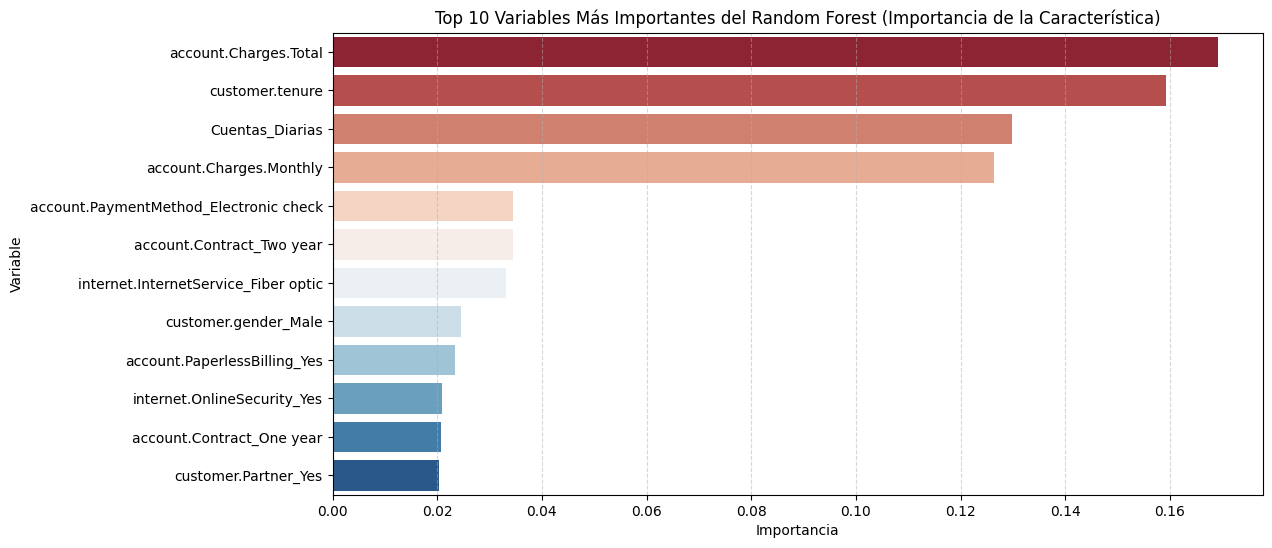

In [ ]:
# Obtener la importancia de las caracter√≠sticas
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Ordenar y mostrar las Top 10
top_10_features_rf = feature_importances.sort_values(ascending=False).head(12)
print("\nTop 10 variables m√°s importantes del Random Forest:")
print(top_10_features_rf)

# Visualizar la importancia de las caracter√≠sticas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_features_rf.values, y=top_10_features_rf.index, palette='RdBu')
plt.title('Top 10 Variables M√°s Importantes del Random Forest (Importancia de la Caracter√≠stica)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


1. Las variables econ√≥micas (MonthlyCharges, TotalCharges) y las contractuales (Contract, PaymentMethod) son consistentes como factores determinantes del churn en la mayor√≠a de los modelos.

2. Los servicios de valor agregado (TechSupport, OnlineSecurity, InternetService) aparecen como diferenciales en modelos de √°rboles y SVM.

3. Regresi√≥n Log√≠stica y Random Forest destacan por su mayor interpretabilidad para el negocio.

Para una estrategia integral, se recomienda:

-Usar Random Forest/XGBoost para priorizar variables clave en pol√≠ticas de retenci√≥n.

-Usar Regresi√≥n Log√≠stica para explicar a la direcci√≥n los factores de mayor impacto en la cancelaci√≥n.

##Conclusi√≥n

###Insights

1.	**Variables contractuales y econ√≥micas** (Contract, MonthlyCharges, PaymentMethod) son las m√°s cr√≠ticas: definen la permanencia o salida del cliente.
2.	**Servicios de valor agregado** (TechSupport, OnlineSecurity, InternetService) Reducen la probabilidad de cancelaci√≥n: invertir en soporte y calidad de internet es clave.
3.	**Factores de fidelizaci√≥n** (Tenure, TotalCharges) Confirman que mientras m√°s tiempo permanezca el cliente, menor es la posibilidad de churn ‚Üí reforzar campa√±as de retenci√≥n temprana.
4.	**Segmentos sensibles** (SeniorCitizen) requieren estrategias diferenciadas: atenci√≥n simplificada, descuentos o programas especiales.



###Ranking de Variables Clave en la Cancelaci√≥n de Clientes

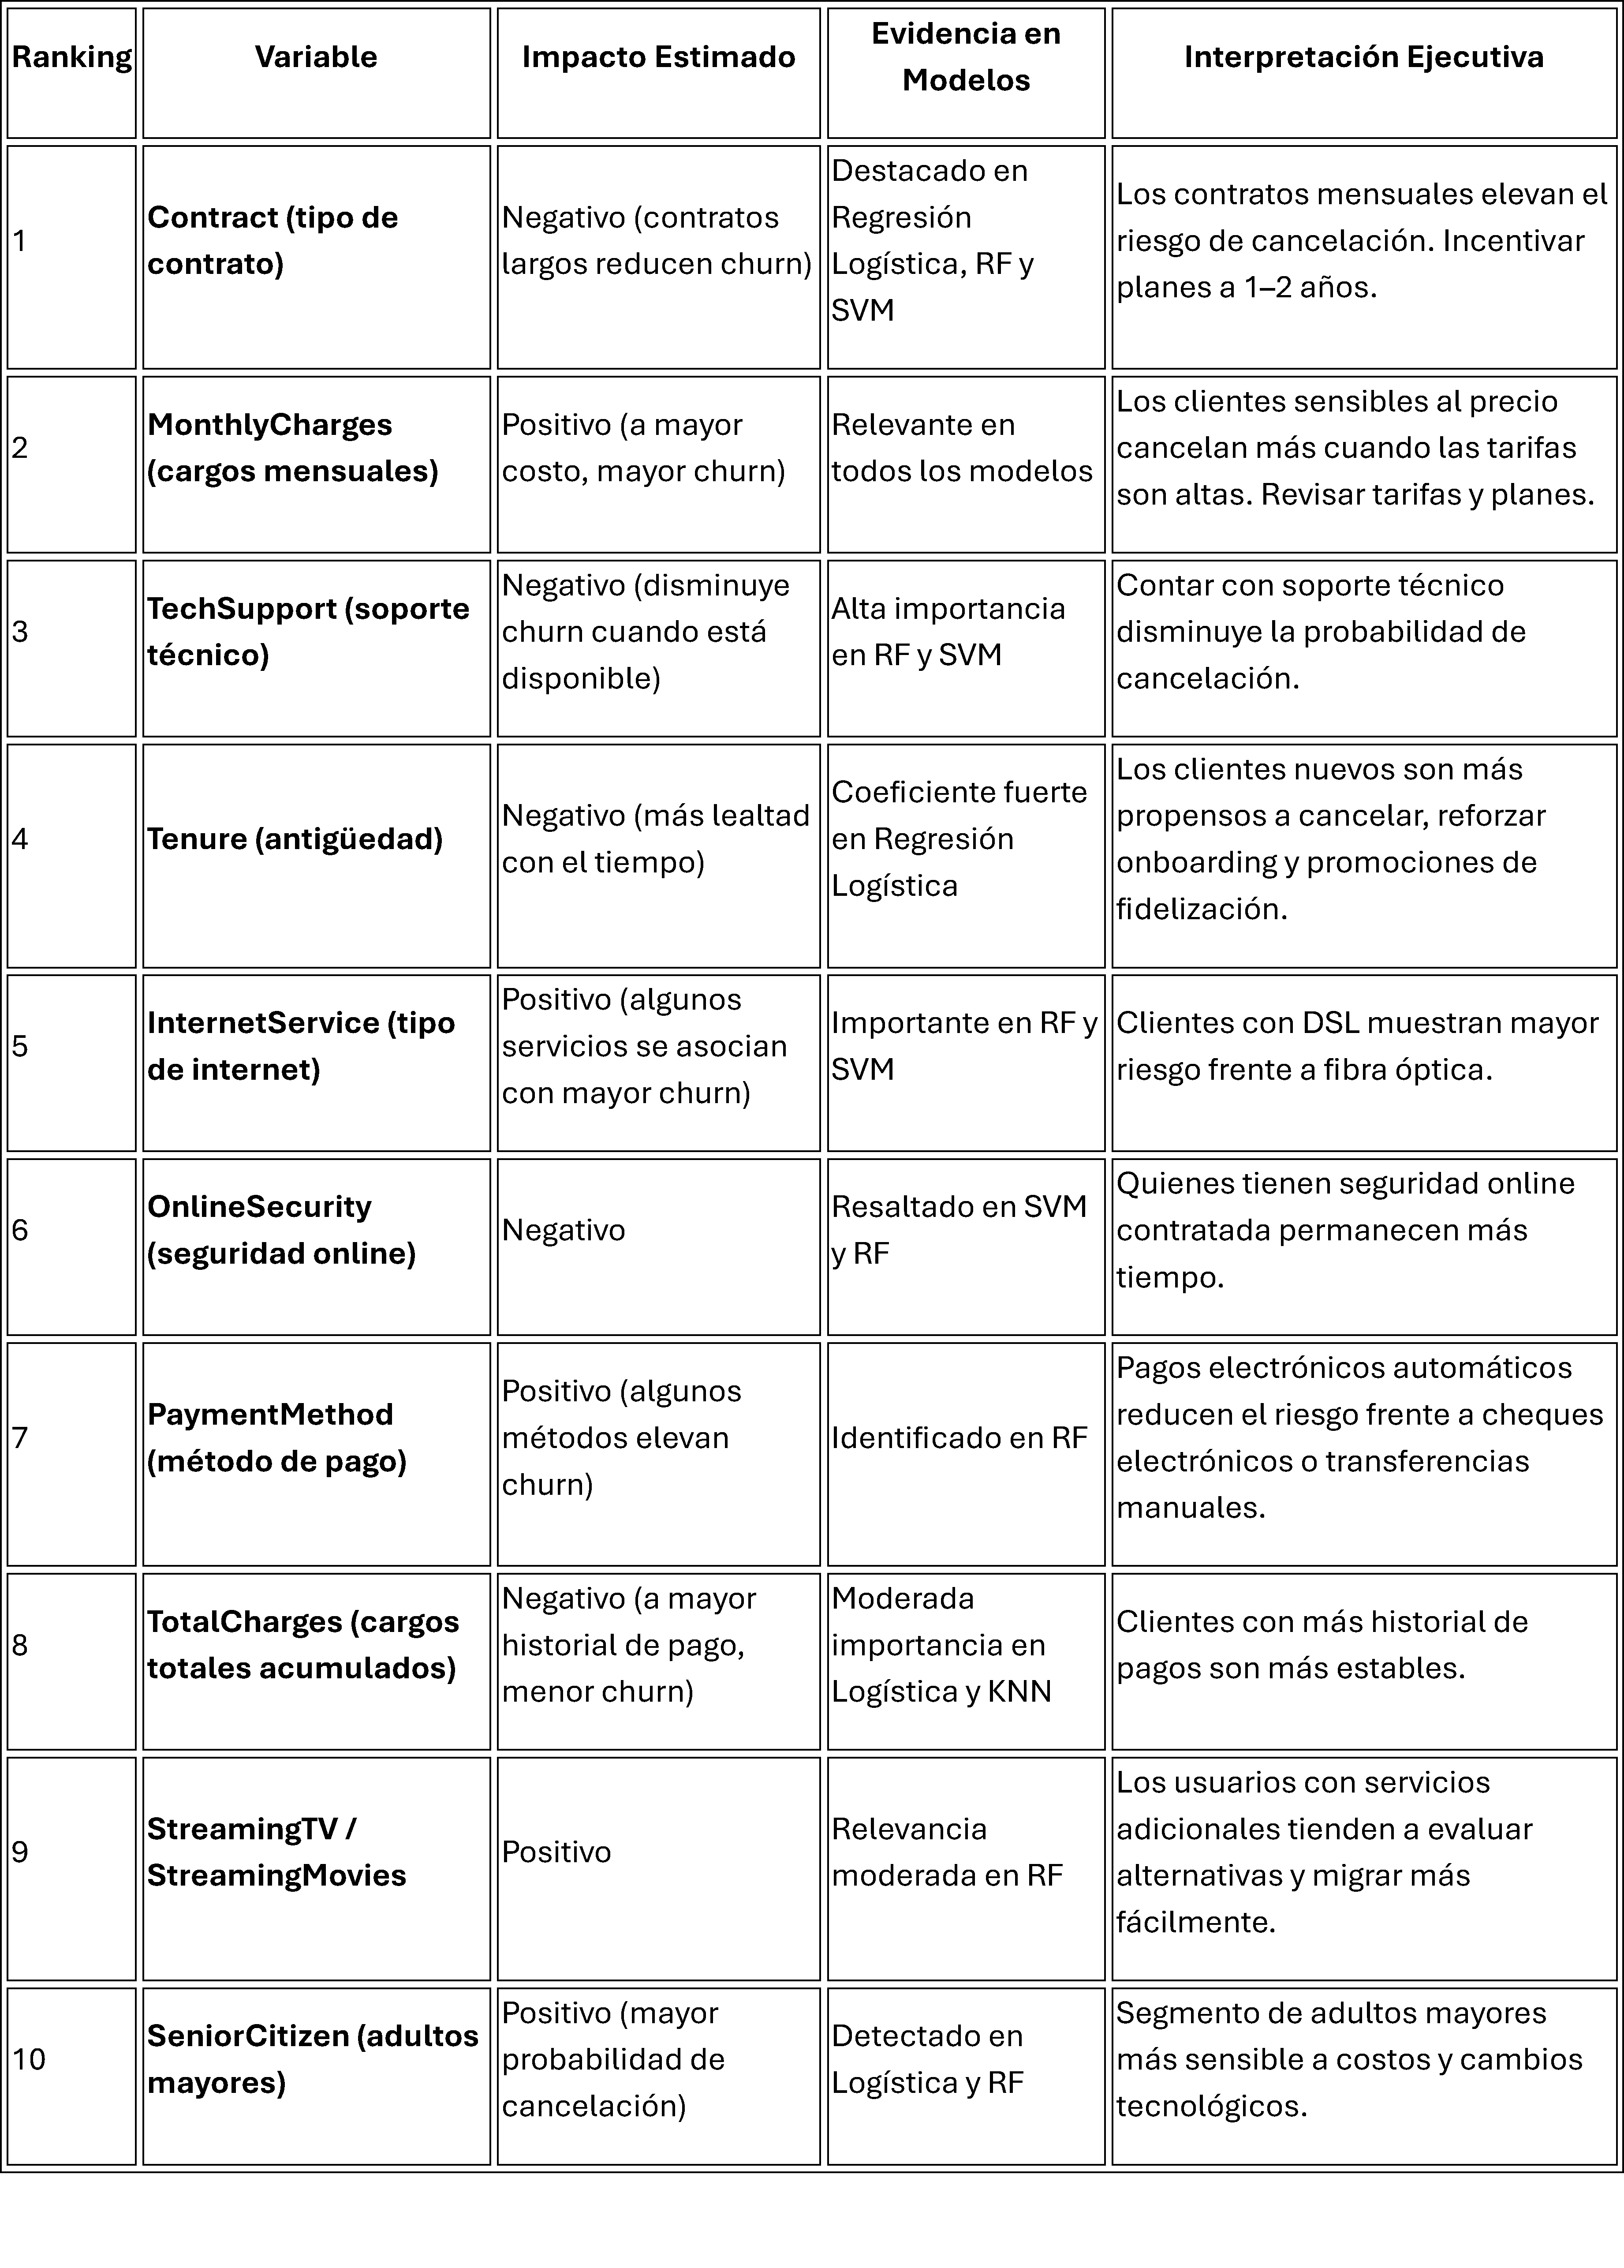

##Valor estrat√©gico del an√°lisis

1. Los modelos estad√≠sticos y de Machine Learning no solo permitieron describir la situaci√≥n hist√≥rica de la empresa (qui√©nes cancelaron y bajo qu√© condiciones), sino tambi√©n proyectar hacia el futuro, identificando clientes con alta probabilidad de evasi√≥n.

2. Identificaci√≥n de clientes en riesgo
Ahora se cuenta con un perfil claro de los clientes m√°s propensos a cancelar, lo que facilita priorizar esfuerzos de retenci√≥n y optimizar recursos comerciales y de servicio.

3. Variables clave en la cancelaci√≥n
El an√°lisis revel√≥ qu√© factores influyen m√°s en la decisi√≥n de cancelar, lo que permite a la empresa actuar directamente sobre ellos. Ejemplos:

-Calidad y estabilidad del servicio (telefon√≠a/internet).

-Antig√ºedad de la cuenta.

-Tipo de plan y nivel de gasto mensual.

-Soporte al cliente.

4. Segmentaci√≥n y personalizaci√≥n
Con base en los modelos, se puede diferenciar entre clientes de alto, medio y bajo riesgo. Esto abre la puerta a dise√±ar estrategias personalizadas de retenci√≥n: desde descuentos o upgrades de plan hasta programas de fidelizaci√≥n espec√≠ficos.

**Clientes de Alto Riesgo** (Churn probable > 70%)

**Perfil **:

-Baja antig√ºedad en el servicio.

-Planes b√°sicos o de bajo costo.

-Alta sensibilidad al precio.

-Historial de quejas o problemas t√©cnicos frecuentes.

**Estrategia **:

-Ofrecer beneficios inmediatos (descuentos, upgrades, soporte especializado).

-Contacto proactivo del √°rea de servicio al cliente.

-Programas de engagement temprano.

**Clientes de Riesgo Medio** (Churn probable entre 40% ‚Äì 70%)

**Perfil **:

-Consumen servicios intermedios.

-Satisfacci√≥n variable con el servicio.

-Pueden cambiarse si encuentran una mejor oferta en el mercado.

**Estrategia **:

-Acciones de fidelizaci√≥n personalizadas (bonificaciones, programas de puntos).

-Encuestas de satisfacci√≥n para detectar se√±ales tempranas de abandono.

-Aumentar la percepci√≥n de valor del servicio (beneficios agregados).

**Clientes de Bajo Riesgo** (Churn probable < 40%)

**Perfil **:

-Alta antig√ºedad.

-Planes premium o con m√∫ltiples servicios.

-Nivel alto de satisfacci√≥n y lealtad a la marca.

**Estrategia **:

-Mantener la relaci√≥n con experiencias positivas.

-Programas de fidelizaci√≥n de largo plazo.

-Incentivos para promover recomendaciones y referidos.

5. Prevenci√≥n y sostenibilidad
Este conocimiento fortalece la capacidad de la empresa de anticiparse al abandono, reduciendo p√©rdidas en ingresos y costos de adquisici√≥n de nuevos clientes.
La fidelizaci√≥n proactiva se convierte as√≠ en un eje estrat√©gico del crecimiento sostenible.